In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))


In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

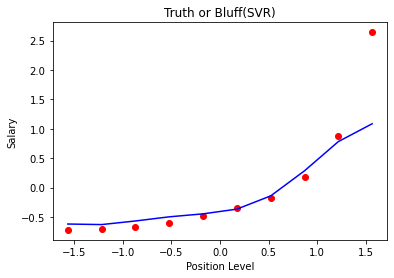

In [8]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()